## Accuracy on target


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("5050_kids_train_cleaned.csv")
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,PurchDay,PurchWeekDay,EngineLiters,NumCylinders,4X4,WheelDrive,NumDoors,PCA1,PCA2,IsBadBuy
0,9484,6/29/2009,MANHEIM,2004.0,5.0,KIA,SPECTRA,EX,SEDAN,GOLD,...,29.0,Monday,2.000000,4.0,0,0,4.0,-12583.504418,956.191948,0
1,47185,9/15/2009,MANHEIM,2005.0,5.0,CHRYSLER,ION,Tou,SEDAN,SILVER,...,21.0,Tuesday,3.179050,8.0,0,0,4.0,2577.708270,-1445.484267,0
2,52559,11/3/2010,OTHER,2008.0,2.0,MAZDA,MAZDA3,i,SPORT,SILVER,...,3.0,Wednesday,4.278157,7.0,0,0,4.0,14832.457604,465.552450,0
3,52150,7/30/2010,MANHEIM,2007.0,3.0,CHRYSLER,PT CRUISER,LE,SEDAN,SILVER,...,24.0,Friday,1.660941,4.0,0,0,4.0,14200.129833,-586.242603,0
4,36222,6/3/2009,MANHEIM,2004.0,5.0,KIA,OPTIMA,EX,SEDAN,BLACK,...,3.0,Wednesday,2.400000,4.0,0,0,4.0,-10380.306456,1254.054165,0


In [3]:
for e in df.columns:
    print(e)

RefId
PurchDate
Auction
VehYear
VehicleAge
Make
Model
Trim
SubModel
Color
Transmission
WheelType
VehOdo
Nationality
AAAP
AACP
ARAP
ARCP
CAAP
CACP
CRAP
CRCP
BYRNO
VNST
VehBCost
WarrantyCost
PurchYear
PurchMonth
PurchDay
PurchWeekDay
EngineLiters
NumCylinders
4X4
WheelDrive
NumDoors
PCA1
PCA2
IsBadBuy


In [4]:
categories = ['Model', 'Make', 'Trim', 'BYRNO', 'WheelType', 'Color', 'VNST','IsBadBuy']

not_cat = ['VehOdo', 'VehBCost', 'WarrantyCost', 'AAAP', 'VehicleAge']

to_drop = ['AACP', 'ARAP', 'ARCP', 'CAAP', 'CACP', 'CRAP', 'CRCP', 'NumCylinders', '4X4', 'WheelDrive',
           'NumDoors', 'PCA1', 'PCA2', 'RefId', 'PurchDate', 'PurchYear', 'PurchMonth',
            'PurchDay', 'VehYear', 'EngineLiters', 'Auction', 'PurchWeekDay',
'Transmission', 'Nationality','SubModel']

In [5]:
df.drop(columns= to_drop, axis=1, inplace=True) 

In [6]:
df.head()

,VehicleAge,Make,Model,Trim,Color,WheelType,VehOdo,AAAP,BYRNO,VNST,VehBCost,WarrantyCost,IsBadBuy
0,5.0,KIA,SPECTRA,EX,GOLD,Covers,71548,3161.0,20740,NC,4635.0,569,0
1,5.0,CHRYSLER,ION,Tou,SILVER,Covers,83039,3947.0,22808,TX,9350.0,1503,0
2,2.0,MAZDA,MAZDA3,i,SILVER,Alloy,49500,10477.0,99761,NH,7965.0,764,0
3,3.0,CHRYSLER,PT CRUISER,LE,SILVER,Covers,95093,10262.0,18822,TX,4735.0,1630,0
4,5.0,KIA,OPTIMA,EX,BLACK,Alloy,59251,3402.0,20207,TX,5060.0,671,0


In [7]:
for col in categories:
    df[col] = df[col].astype('category')
    
df['VehicleAge'] = df['VehicleAge'].astype('int')

In [8]:
sum_ = df.isnull().sum()
sum_[sum_ != 0]

Series([], dtype: int64)

## BINNING

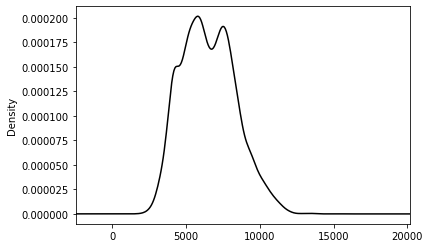

In [9]:
x = plt.xlim((-2500, 20200))
df["VehBCost"].plot.kde(x = 'x', color = 'black') 

In [10]:
bins = [df.VehBCost.min() - 1,5000, 7000, 8000, 10000, df.VehBCost.max()]

df['VehBCost'] = pd.cut(df['VehBCost'], bins)

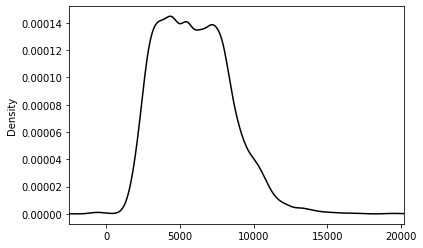

In [11]:
x = plt.xlim((-2500, 20200))
df["AAAP"].plot.kde(x = 'x', color = 'black') 

In [12]:
bins = [df.AAAP.min() - 1, 3000, 6000, 8000, 10000, df.AAAP.max()]

df['AAAP'] = pd.cut(df['AAAP'], bins)

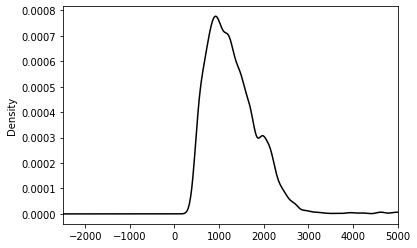

In [13]:
x = plt.xlim((-2500, 5000))
df["WarrantyCost"].plot.kde(x = 'x', color = 'black') 

In [14]:
bins = [df.WarrantyCost.min() - 1,700, 1200, 1800, 2600, df.WarrantyCost.max()]

df['WarrantyCost'] = pd.cut(df['WarrantyCost'], bins)

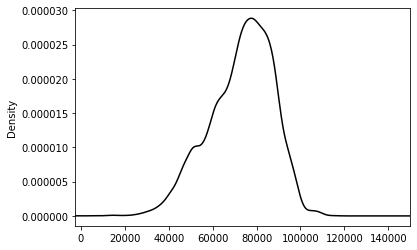

In [15]:
x = plt.xlim((-2500, 150000))
df["VehOdo"].plot.kde(x = 'x', color = 'black') 

In [16]:
bins = [df.VehOdo.min() - 1,40000, 60000, 80000, 100000, df.VehOdo.max()]

df['VehOdo'] = pd.cut(df['VehOdo'], bins)

In [17]:
df['VehicleAge'] = pd.cut(df['VehicleAge'], [0, 2, 4, 6, 8, 10], right=False)

In [18]:
df.head()

,VehicleAge,Make,Model,Trim,Color,WheelType,VehOdo,AAAP,BYRNO,VNST,VehBCost,WarrantyCost,IsBadBuy
0,"[4, 6)",KIA,SPECTRA,EX,GOLD,Covers,"(60000, 80000]","(3000.0, 6000.0]",20740,NC,"(224.0, 5000.0]","(461, 700]",0
1,"[4, 6)",CHRYSLER,ION,Tou,SILVER,Covers,"(80000, 100000]","(3000.0, 6000.0]",22808,TX,"(8000.0, 10000.0]","(1200, 1800]",0
2,"[2, 4)",MAZDA,MAZDA3,i,SILVER,Alloy,"(40000, 60000]","(10000.0, 35722.0]",99761,NH,"(7000.0, 8000.0]","(700, 1200]",0
3,"[2, 4)",CHRYSLER,PT CRUISER,LE,SILVER,Covers,"(80000, 100000]","(10000.0, 35722.0]",18822,TX,"(224.0, 5000.0]","(1200, 1800]",0
4,"[4, 6)",KIA,OPTIMA,EX,BLACK,Alloy,"(40000, 60000]","(3000.0, 6000.0]",20207,TX,"(5000.0, 7000.0]","(461, 700]",0


In [19]:
df['VehicleAge'] = 'Age:' + df['VehicleAge'].astype(str)
df['VehOdo'] = 'Odo:' + df['VehOdo'].astype(str)
df['AAAP'] = 'AAAP:' + df['AAAP'].astype(str)
df['WarrantyCost'] = 'WarrCost:' + df['WarrantyCost'].astype(str)
df['VehBCost'] = 'VehBCost:' + df['VehBCost'].astype(str)

df['BuyStatus'] = df['IsBadBuy'].map(
    {0: 'GoodBuy', 1: 'BadBuy'}).astype(str)
df.drop(columns=['IsBadBuy'], inplace=True)


In [20]:
df.head()

,VehicleAge,Make,Model,Trim,Color,WheelType,VehOdo,AAAP,BYRNO,VNST,VehBCost,WarrantyCost,BuyStatus
0,"Age:[4, 6)",KIA,SPECTRA,EX,GOLD,Covers,"Odo:(60000, 80000]","AAAP:(3000.0, 6000.0]",20740,NC,"VehBCost:(224.0, 5000.0]","WarrCost:(461, 700]",GoodBuy
1,"Age:[4, 6)",CHRYSLER,ION,Tou,SILVER,Covers,"Odo:(80000, 100000]","AAAP:(3000.0, 6000.0]",22808,TX,"VehBCost:(8000.0, 10000.0]","WarrCost:(1200, 1800]",GoodBuy
2,"Age:[2, 4)",MAZDA,MAZDA3,i,SILVER,Alloy,"Odo:(40000, 60000]","AAAP:(10000.0, 35722.0]",99761,NH,"VehBCost:(7000.0, 8000.0]","WarrCost:(700, 1200]",GoodBuy
3,"Age:[2, 4)",CHRYSLER,PT CRUISER,LE,SILVER,Covers,"Odo:(80000, 100000]","AAAP:(10000.0, 35722.0]",18822,TX,"VehBCost:(224.0, 5000.0]","WarrCost:(1200, 1800]",GoodBuy
4,"Age:[4, 6)",KIA,OPTIMA,EX,BLACK,Alloy,"Odo:(40000, 60000]","AAAP:(3000.0, 6000.0]",20207,TX,"VehBCost:(5000.0, 7000.0]","WarrCost:(461, 700]",GoodBuy


## APRIORI


In [21]:
from fim import apriori

In [22]:
baskets = df.values.tolist()

In [23]:
#supporto 2
itemsets = apriori(baskets, supp=11, zmin=3, target='a')

In [24]:
print('Number of itemsets:', len(itemsets))


Number of itemsets: 5


In [25]:
itemsets.sort(key=lambda x: x[1],reverse=True)


In [26]:
itemsets

[(('Odo:(60000, 80000]', 'Alloy', 'GoodBuy'), 1749),
 (('VehBCost:(5000.0, 7000.0]', 'Age:[4, 6)', 'AAAP:(3000.0, 6000.0]'), 1715),
 (('VehBCost:(5000.0, 7000.0]', 'AAAP:(3000.0, 6000.0]', 'BadBuy'), 1669),
 (('Age:[4, 6)', 'AAAP:(3000.0, 6000.0]', 'BadBuy'), 1666),
 (('Age:[4, 6)', 'Alloy', 'GoodBuy'), 1610)]

## Association Rules

In [27]:
rules = apriori(baskets, supp=11, zmin=3, target='r', conf=60, 
                report='ascl')

In [28]:
print('Number of rule:', len(rules))
rules[0]

Number of rule: 18


('BadBuy',
 ('VehBCost:(224.0, 5000.0]', 'AAAP:(3000.0, 6000.0]'),
 1039,
 0.0720826973775496,
 0.6133412042502951,
 1.2266824085005903)

In [29]:
rules.sort(key=lambda x: x[4],reverse=True)

In [30]:
count = 0
for r in rules:
    if r[5] > 0.60 and r[5]:
        print(r)
        count += 1
        if count == 10:
            break

('AAAP:(3000.0, 6000.0]', ('VehBCost:(5000.0, 7000.0]', 'Age:[4, 6)'), 1715, 0.11898154571943943, 0.7239341494301393, 1.7154014186891382)
('GoodBuy', ('AAAP:(6000.0, 8000.0]', 'Covers'), 1142, 0.07922852782017482, 0.7010435850214856, 1.4020871700429711)
('GoodBuy', ('Age:[2, 4)', 'Covers'), 1411, 0.09789093936450673, 0.686952288218111, 1.373904576436222)
('AAAP:(3000.0, 6000.0]', ('Covers', 'Age:[4, 6)'), 1394, 0.09671153045650062, 0.6498834498834499, 1.5399342506362068)
('GoodBuy', ('CHRYSLER', 'Covers'), 1340, 0.09296517274871653, 0.6479690522243714, 1.2959381044487428)
('GoodBuy', ('WarrCost:(700, 1200]', 'Covers'), 1365, 0.09469959761343139, 0.6438679245283019, 1.2877358490566038)
('AAAP:(3000.0, 6000.0]', ('VehBCost:(5000.0, 7000.0]', 'BadBuy'), 1669, 0.11579020396836409, 0.6321969696969697, 1.4980251719894988)
('GoodBuy', ('GM', 'Covers'), 1235, 0.08568058831691411, 0.6278596847991865, 1.255719369598373)
('GoodBuy', ('VehBCost:(5000.0, 7000.0]', 'Covers'), 1518, 0.105314277785486

In [31]:
rules = apriori(baskets, supp=11, zmin=3, target='r', conf=70, 
                report='ascl')

In [32]:
rules.sort(key=lambda x: x[4],reverse=True)

In [33]:
count = 0
for r in rules:
    if r[5] > 0.70 and r[5]:
        print(r)
        count += 1
        if count == 10:
            break

('AAAP:(3000.0, 6000.0]', ('VehBCost:(5000.0, 7000.0]', 'Age:[4, 6)'), 1715, 0.11898154571943943, 0.7239341494301393, 1.7154014186891382)
('GoodBuy', ('AAAP:(6000.0, 8000.0]', 'Covers'), 1142, 0.07922852782017482, 0.7010435850214856, 1.4020871700429711)


In [34]:
df['Predicted'] = df['BuyStatus']

In [35]:
df['Predicted']  = np.where((np.logical_and(df['AAAP'] == 'AAAP:(6000.0, 8000.0]' ,df['WheelType'] == 'Covers')),str('GoodBuy'),str('BadBuy'))

In [36]:
df['Predicted']  = np.where((np.logical_and(df['VehicleAge'] == 'Age:[2, 4)' ,df['WheelType'] == 'Covers')),str('GoodBuy'),str('BadBuy'))

In [37]:
len(df['Predicted'])

14414

In [38]:
len(df['BuyStatus']) #OK!

14414

In [39]:
#DOVREBBE ESSERE IL NUMERO TOTALE DI TRUE POSITIVE E TRUE NEGATIVE
len(df[df.Predicted == df.BuyStatus]) 

7975

In [40]:
#DOVREBBE ESSERE IL NUMERO TOTALE DI FALSE POSITIVE E FALSE NEGATIVE

len(df[df.Predicted != df.BuyStatus]) 

6439

In [41]:
#Accuratezza = TP+TN/TP+TN+FP+FN

7975/(7975+6439)

0.5532815318440405

PROVA MALEDETTO LOWRENZO CHE OVVIAMENTE E' LA MIGLIORE

In [42]:
df['PredictionLore'] = "NotPredicted"

In [43]:
#('GoodBuy', ('AAAP:(6000.0, 8000.0]', 'Covers'), 1142, 0.07922852782017482, 0.7010435850214856, 1.4020871700429711)
df['PredictionLore']  = np.where((np.logical_and(df['AAAP'] == 'AAAP:(6000.0, 8000.0]' ,df['WheelType'] == 'Covers')),str('GoodBuy'),df['PredictionLore'] )

In [44]:
#('GoodBuy', ('Age:[2, 4)', 'Covers'), 1411, 0.09789093936450673, 0.686952288218111, 1.373904576436222)
df['PredictionLore']  = np.where((np.logical_and(df['VehicleAge'] == 'Age:[2, 4)' ,df['WheelType'] == 'Covers')),str('GoodBuy'),df['PredictionLore'])

In [45]:
#('GoodBuy', ('CHRYSLER', 'Covers'), 1340, 0.09296517274871653, 0.6479690522243714, 1.2959381044487428)
df['PredictionLore']  = np.where(np.logical_and(df['Make'] == 'CHRYSLER' ,df['WheelType'] == 'Covers'),str('GoodBuy'),df['PredictionLore'])

In [46]:
#('BadBuy', ('VehBCost:(224.0, 5000.0]', 'AAAP:(3000.0, 6000.0]'), 1039, 0.0720826973775496, 0.6133412042502951, 1.2266824085005903)
ppp = np.logical_and(df['VehBCost'] == 'VehBCost:(224.0, 5000.0]' ,df['AAAP'] == 'AAAP:(3000.0, 6000.0]')
df['PredictionLore']  = np.where(np.logical_and(ppp, df['PredictionLore'] == 'NotPredicted'),str('BadBuy'),df['PredictionLore'])

In [47]:
len(df[df['PredictionLore'] != 'NotPredicted'])

5123

In [48]:
df_temp = df[df['PredictionLore'] != 'NotPredicted']
type(df_temp)

pandas.core.frame.DataFrame

In [49]:
df_temp[df_temp['PredictionLore'] == df_temp['BuyStatus']]

,VehicleAge,Make,Model,Trim,Color,WheelType,VehOdo,AAAP,BYRNO,VNST,VehBCost,WarrantyCost,BuyStatus,Predicted,PredictionLore
1,"Age:[4, 6)",CHRYSLER,ION,Tou,SILVER,Covers,"Odo:(80000, 100000]","AAAP:(3000.0, 6000.0]",22808,TX,"VehBCost:(8000.0, 10000.0]","WarrCost:(1200, 1800]",GoodBuy,BadBuy,GoodBuy
3,"Age:[2, 4)",CHRYSLER,PT CRUISER,LE,SILVER,Covers,"Odo:(80000, 100000]","AAAP:(10000.0, 35722.0]",18822,TX,"VehBCost:(224.0, 5000.0]","WarrCost:(1200, 1800]",GoodBuy,GoodBuy,GoodBuy
5,"Age:[0, 2)",CHRYSLER,AVENGER,SE,SILVER,Covers,"Odo:(40000, 60000]","AAAP:(6000.0, 8000.0]",99761,AZ,"VehBCost:(7000.0, 8000.0]","WarrCost:(700, 1200]",GoodBuy,BadBuy,GoodBuy
7,"Age:[2, 4)",GM,IMPALA,LS,GREY,Covers,"Odo:(40000, 60000]","AAAP:(8000.0, 10000.0]",99750,MD,"VehBCost:(7000.0, 8000.0]","WarrCost:(1200, 1800]",GoodBuy,GoodBuy,GoodBuy
11,"Age:[2, 4)",FORD,TRAILBLAZER,LS,WHITE,Covers,"Odo:(40000, 60000]","AAAP:(6000.0, 8000.0]",20833,TX,"VehBCost:(5000.0, 7000.0]","WarrCost:(700, 1200]",GoodBuy,GoodBuy,GoodBuy
14,"Age:[2, 4)",CHRYSLER,SEBRING,Bas,BLACK,Covers,"Odo:(40000, 60000]","AAAP:(6000.0, 8000.0]",99750,NJ,"VehBCost:(7000.0, 8000.0]","WarrCost:(700, 1200]",GoodBuy,GoodBuy,GoodBuy
16,"Age:[2, 4)",CHRYSLER,CHARGER,Bas,GREY,Covers,"Odo:(60000, 80000]","AAAP:(10000.0, 35722.0]",52644,TX,"VehBCost:(8000.0, 10000.0]","WarrCost:(1200, 1800]",GoodBuy,GoodBuy,GoodBuy
19,"Age:[4, 6)",GM,VIBE,Bas,WHITE,Covers,"Odo:(60000, 80000]","AAAP:(6000.0, 8000.0]",10315,FL,"VehBCost:(8000.0, 10000.0]","WarrCost:(461, 700]",GoodBuy,BadBuy,GoodBuy
25,"Age:[2, 4)",NISSAN,ALTIMA,Bas,WHITE,Covers,"Odo:(60000, 80000]","AAAP:(10000.0, 35722.0]",20740,SC,"VehBCost:(10000.0, 36485.0]","WarrCost:(461, 700]",GoodBuy,GoodBuy,GoodBuy
29,"Age:[2, 4)",GM,ION,LT,BLACK,Covers,"Odo:(60000, 80000]","AAAP:(6000.0, 8000.0]",20234,AZ,"VehBCost:(5000.0, 7000.0]","WarrCost:(700, 1200]",GoodBuy,GoodBuy,GoodBuy


In [50]:
len(df_temp[df_temp['PredictionLore'] == df_temp['BuyStatus']])

3366

In [51]:
len(df_temp[df_temp.PredictionLore == df_temp.BuyStatus]) 

3366

In [52]:
len(df_temp[df_temp.PredictionLore != df_temp.BuyStatus]) 

1757

In [53]:
1876/(848+1876)

0.6886930983847284

In [54]:
#Nuova accuratezza schifo 
2844/(2844+1457)

0.6612415717275052

In [55]:
3366/(1757+3366)

0.6570368924458325

In [56]:
df_temp[df_temp['PredictionLore'] != df_temp['BuyStatus']] 

,VehicleAge,Make,Model,Trim,Color,WheelType,VehOdo,AAAP,BYRNO,VNST,VehBCost,WarrantyCost,BuyStatus,Predicted,PredictionLore
0,"Age:[4, 6)",KIA,SPECTRA,EX,GOLD,Covers,"Odo:(60000, 80000]","AAAP:(3000.0, 6000.0]",20740,NC,"VehBCost:(224.0, 5000.0]","WarrCost:(461, 700]",GoodBuy,BadBuy,BadBuy
13,"Age:[4, 6)",GM,ENDEAVOR,SE,PURPLE,Covers,"Odo:(60000, 80000]","AAAP:(3000.0, 6000.0]",21053,CA,"VehBCost:(224.0, 5000.0]","WarrCost:(700, 1200]",GoodBuy,BadBuy,BadBuy
21,"Age:[4, 6)",CHRYSLER,STRATUS,SXT,WHITE,Alloy,"Odo:(80000, 100000]","AAAP:(3000.0, 6000.0]",835,AZ,"VehBCost:(224.0, 5000.0]","WarrCost:(1200, 1800]",GoodBuy,BadBuy,BadBuy
26,"Age:[4, 6)",CHRYSLER,NEON,SXT,BLACK,Alloy,"Odo:(60000, 80000]","AAAP:(3000.0, 6000.0]",18111,TN,"VehBCost:(224.0, 5000.0]","WarrCost:(461, 700]",GoodBuy,BadBuy,BadBuy
55,"Age:[4, 6)",GM,GRAND PRIX,Bas,GOLD,Covers,"Odo:(4824, 40000]","AAAP:(3000.0, 6000.0]",835,AZ,"VehBCost:(224.0, 5000.0]","WarrCost:(461, 700]",GoodBuy,BadBuy,BadBuy
65,"Age:[4, 6)",GM,FOCUS,SXT,WHITE,Alloy,"Odo:(80000, 100000]","AAAP:(3000.0, 6000.0]",20928,FL,"VehBCost:(224.0, 5000.0]","WarrCost:(1800, 2600]",GoodBuy,BadBuy,BadBuy
91,"Age:[4, 6)",FORD,FOCUS,ZX5,SILVER,Alloy,"Odo:(80000, 100000]","AAAP:(3000.0, 6000.0]",52598,TX,"VehBCost:(224.0, 5000.0]","WarrCost:(1200, 1800]",GoodBuy,BadBuy,BadBuy
105,"Age:[6, 8)",GM,CHARGER,Tou,GOLD,Covers,"Odo:(60000, 80000]","AAAP:(3000.0, 6000.0]",19619,FL,"VehBCost:(224.0, 5000.0]","WarrCost:(1200, 1800]",GoodBuy,BadBuy,BadBuy
108,"Age:[6, 8)",GM,ION,2,BLACK,Covers,"Odo:(80000, 100000]","AAAP:(3000.0, 6000.0]",22808,TN,"VehBCost:(224.0, 5000.0]","WarrCost:(700, 1200]",GoodBuy,BadBuy,BadBuy
138,"Age:[6, 8)",NISSAN,SENTRA,S,GREY,Covers,"Odo:(80000, 100000]","AAAP:(3000.0, 6000.0]",1151,CA,"VehBCost:(224.0, 5000.0]","WarrCost:(461, 700]",GoodBuy,BadBuy,BadBuy
